# Assignment Day 1
---

## Part 1
## Creating a simple linear regression function 

Using the **salary_data.csv** file perform the following:

In [1]:
# Load the libraries required
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from math import log, sqrt
import warnings
from sklearn.externals import joblib
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
# Load the data
dataset = pd.read_csv('../datasets/salary_data.csv')

In [4]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [5]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
X = dataset.YearsExperience
y = dataset.Salary

In [7]:
# Calculate basic statistics like the mean, max, etc you can use existing functions of python
y.describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64

In [8]:
X.describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64

In [9]:
# Compute correlation, in case something is missing complete it
from scipy import stats
cor, pval = stats.pearsonr(X.values,y.values)
print("Parametric Pearson cor test: cor: %.4f, pval: %.8f" % (cor,pval))

Parametric Pearson cor test: cor: 0.9782, pval: 0.00000000


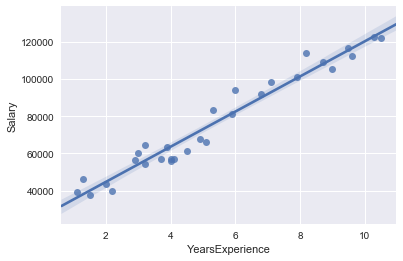

In [10]:
# Make a scatter plot of both
sns.regplot(X, y)

In [11]:
def simple_linear_regression(x, y):
    """
    Only two vectors function
    """
    xy = x * y
    mean_xy = xy.mean()#xy.sum()/len(xy)
    mean_x = x.mean()
    mean_y = y.mean()
    xx = x * x # create xx variable mean_xx = xx.mean()
    mean_xx = xx.mean()
    x_sqr = mean_x * mean_x
    #compute slope
    cov_xy = mean_xy - mean_x * mean_y 
    var_x = mean_xx - x_sqr
    slope = cov_xy / var_x #use the slope for the intercept 
    intercept = mean_y - slope * mean_x
    print('Simple linear regression works!')
    return intercept, slope

![](../img/model_formula.png)

We can test that our function works by passing it something where we know the answer. In particular we can generate a feature and then put the target exactly on a line: [y = 1 + 1 * y] then we know both our slope and intercept should be 1

In [12]:
test_feature = np.array(list(range(5)))
test_target = np.array([1+ 1*i for i in test_feature])
test_intercept, test_slope =  simple_linear_regression(test_feature, test_target)
print ("Intercept: {}".format(test_intercept))
print ("Slope: {}".format(test_slope))

Simple linear regression works!
Intercept: 1.0
Slope: 1.0


In [13]:
# Using the function from scikitlearn split the data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [15]:
intercept, slope = simple_linear_regression(X, y)

Simple linear regression works!


In [16]:
print ("Intercept: {}".format(round(intercept,2)))
print ("Slope: {}".format(slope))

Intercept: 25792.2
Slope: 9449.962321455081


Now that we have the model parameters: intercept & slope we can make predictions. Complete the following function to return the predicted target given the input_feature, slope and intercept:

In [17]:
def get_regression_predictions(input_feature, intercept, slope):
    return intercept + slope * input_feature

Set a new value to try the function

In [18]:
new_value = 10
prediction = get_regression_predictions(new_value, intercept, slope)

In [19]:
prediction

120291.82341321948

In [20]:
prediction_ = get_regression_predictions(X_test, intercept, slope)

Now that we have a model and can make predictions let's evaluate our model using MSE. 

In [21]:
r2_score(y_test, prediction_)

0.9411739025684825

## Part 2
## Choose the best algorithm for your data

Pick one of the datasets:  
- insurance-kaggle.csv
- airbnb_london.csv
- crime_population_netherlands.csv

And perform the following:

Having preliminalry results of predictions, move on and compute the whole pipeline from Scikitlearn

In [22]:
# Load the data
#https://politieopendata.cbs.nl/portal.html?_la=nl&_catalog=Politie&graphtype=Table&tableId=47004NED&_theme=66
dataset = pd.read_csv('../datasets/crime_population_netherlands.csv')

In [23]:
dataset.columns

Index(['CBScode', 'Municipality', 'Province', 'Population',
       'Population_density(p/km)', 'HIC: Theft / burglary dwelling, complete',
       'HIC: Theft / burglary dwelling, attempts', 'HIC: Violent Crime',
       'HIC: Street Roof', 'HIC: Robberies', 'Undermining public order',
       'Threat', 'Fire / Explosion', 'Theft of moped, moped, bike',
       'Theft of / from vehicles', 'Theft of motor vehicles',
       'Theft / burglary companies / institutions',
       'Theft / burglary garage / barn / shed', 'Drug trafficking',
       'Trespassing', 'mistreatment', 'Overt violence (person)',
       'Or destruction. cause damage', 'Arms Trade', 'pickpocketing',
       'morals Felony'],
      dtype='object')

In [24]:
dataset.describe()

,Population,Population_density(p/km),"HIC: Theft / burglary dwelling, complete","HIC: Theft / burglary dwelling, attempts",HIC: Violent Crime,HIC: Street Roof,HIC: Robberies,Undermining public order,Threat,Fire / Explosion,...,Theft / burglary companies / institutions,Theft / burglary garage / barn / shed,Drug trafficking,Trespassing,mistreatment,Overt violence (person),Or destruction. cause damage,Arms Trade,pickpocketing,morals Felony
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,...,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,43159.884615,811.246154,97.979487,44.251282,205.753846,10.679487,2.905128,13.982051,77.861538,12.217949,...,68.605128,47.425641,32.028205,5.912821,118.461538,9.430769,242.928205,12.528205,65.148718,18.797436
std,67418.318090,973.824887,219.387051,103.767480,561.367584,76.075239,11.653689,66.946567,220.825994,23.945980,...,196.133507,90.476564,93.849175,18.895807,315.458995,28.402434,466.102905,43.284056,434.852773,42.000092
min,938.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,17742.000000,225.250000,27.000000,10.000000,41.000000,0.000000,0.000000,1.000000,16.000000,2.000000,...,17.000000,12.000000,5.000000,0.000000,24.000000,1.000000,64.000000,2.000000,3.000000,4.000000
50%,26046.500000,415.000000,45.500000,18.000000,78.000000,1.000000,1.000000,3.000000,31.000000,5.000000,...,29.000000,25.000000,12.000000,1.000000,44.500000,3.000000,115.500000,4.000000,8.000000,9.000000
75%,44371.500000,998.000000,84.750000,37.000000,156.000000,4.000000,2.000000,7.000000,60.000000,12.000000,...,55.750000,44.750000,24.750000,4.000000,90.750000,7.000000,227.000000,9.000000,21.000000,17.000000
max,853312.000000,6131.000000,2962.000000,1351.000000,7645.000000,1331.000000,176.000000,1115.000000,3017.000000,243.000000,...,3264.000000,997.000000,1293.000000,265.000000,4356.000000,403.000000,4956.000000,556.000000,8009.000000,530.000000


In [25]:
X = dataset._get_numeric_data().drop('HIC: Violent Crime', axis=1)
y = dataset['HIC: Violent Crime']

In [26]:
# Calculate basic statistics like the mean, max, etc you can use existing functions of python
y.describe()

count     390.000000
mean      205.753846
std       561.367584
min         0.000000
25%        41.000000
50%        78.000000
75%       156.000000
max      7645.000000
Name: HIC: Violent Crime, dtype: float64

In [27]:
X.describe()

,Population,Population_density(p/km),"HIC: Theft / burglary dwelling, complete","HIC: Theft / burglary dwelling, attempts",HIC: Street Roof,HIC: Robberies,Undermining public order,Threat,Fire / Explosion,"Theft of moped, moped, bike",...,Theft / burglary companies / institutions,Theft / burglary garage / barn / shed,Drug trafficking,Trespassing,mistreatment,Overt violence (person),Or destruction. cause damage,Arms Trade,pickpocketing,morals Felony
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,...,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,43159.884615,811.246154,97.979487,44.251282,10.679487,2.905128,13.982051,77.861538,12.217949,284.553846,...,68.605128,47.425641,32.028205,5.912821,118.461538,9.430769,242.928205,12.528205,65.148718,18.797436
std,67418.318090,973.824887,219.387051,103.767480,76.075239,11.653689,66.946567,220.825994,23.945980,877.052516,...,196.133507,90.476564,93.849175,18.895807,315.458995,28.402434,466.102905,43.284056,434.852773,42.000092
min,938.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,17742.000000,225.250000,27.000000,10.000000,0.000000,0.000000,1.000000,16.000000,2.000000,37.250000,...,17.000000,12.000000,5.000000,0.000000,24.000000,1.000000,64.000000,2.000000,3.000000,4.000000
50%,26046.500000,415.000000,45.500000,18.000000,1.000000,1.000000,3.000000,31.000000,5.000000,81.500000,...,29.000000,25.000000,12.000000,1.000000,44.500000,3.000000,115.500000,4.000000,8.000000,9.000000
75%,44371.500000,998.000000,84.750000,37.000000,4.000000,2.000000,7.000000,60.000000,12.000000,195.750000,...,55.750000,44.750000,24.750000,4.000000,90.750000,7.000000,227.000000,9.000000,21.000000,17.000000
max,853312.000000,6131.000000,2962.000000,1351.000000,1331.000000,176.000000,1115.000000,3017.000000,243.000000,11536.000000,...,3264.000000,997.000000,1293.000000,265.000000,4356.000000,403.000000,4956.000000,556.000000,8009.000000,530.000000


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [29]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

In [30]:
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN3', KNeighborsRegressor(n_neighbors=3)))
models.append(('KNN5', KNeighborsRegressor(n_neighbors=5)))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('SVR', SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)))
models.append(('SVRL', SVR(kernel='linear', C=100, gamma='auto')))

In [31]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2') #mean_absolute_error
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 1.000000 (0.000000)
KNN3: 0.818709 (0.176515)
KNN5: 0.793505 (0.187436)
DTR: 0.892858 (0.173442)
SVR: 0.330755 (0.145458)
SVRL: 0.892529 (0.084933)


![evaluations](https://scikit-learn.org/stable/modules/model_evaluation.html)

Text(0,0.5,'R2 Score')

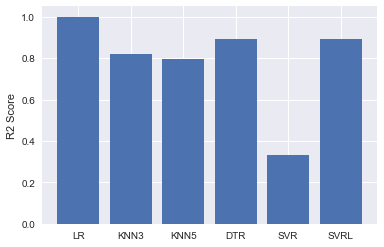

In [32]:
plt.bar(list(range(len(results))), [i.mean() for i in results])
plt.xticks(list(range(len(results))), names)
plt.ylabel('R2 Score')

In [33]:
model_scores = []
for repetition in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = models[3][1]
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    #rmse = sqrt(mean_squared_error(y_test, y_predict))
    r2_s = r2_score(y_test, y_predict)
    model_scores.append(r2_s)

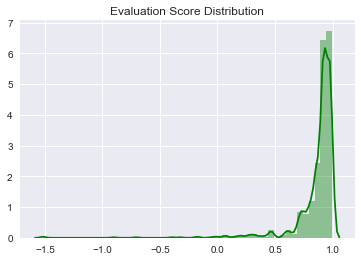

In [34]:
plt.title('Evaluation Score Distribution')
sns.distplot(model_scores, color="g")

In [35]:
filename = 'regressor.sav'
joblib.dump(models[3][1], filename)

['regressor.sav']

---
My function

In [36]:
X = dataset['Arms Trade']
y = dataset['HIC: Violent Crime']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [38]:
intercept, slope = simple_linear_regression(X_train, y_train)
prediction_ = get_regression_predictions(X_test, intercept, slope)

Simple linear regression works!


In [39]:
r2_score(y_test, prediction_)

0.9089898352420978